# <center> Creating the Deseret Alphabet Datset </center>

## Processing Steps

### Load the Dataset

In [1]:
from datasets import load_dataset

iam_data = load_dataset("gagan3012/IAM")["train"]
iam_data

/home/yungdankblast/anaconda3/envs/ocr_translator/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['image', 'label', 'text'],
    num_rows: 11344
})

conveyor to the sanding plant .


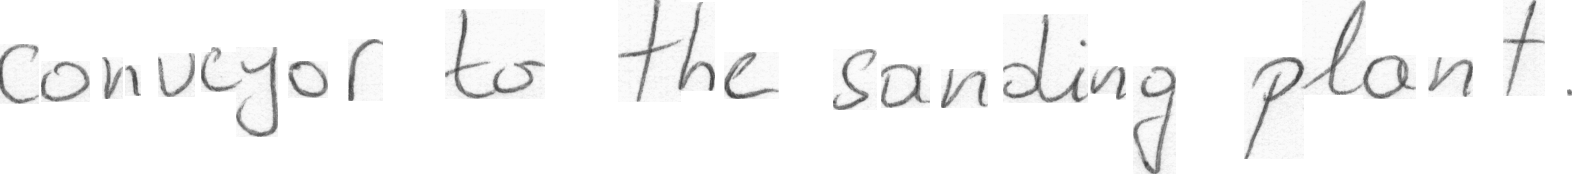

In [2]:
from PIL import Image

idx = 0
english_text = iam_data[idx]["text"]
english_image = iam_data[idx]["image"].convert("RGB")
print(english_text)
display(english_image)

### Translate and Render

In [3]:
from translate import english_to_deseret

deseret_text = english_to_deseret(english_text, local=True)
print(deseret_text)

𐐿𐐲𐑌𐑂𐐩𐐲𐑉 𐐻𐐭 𐑄 𐑅𐐰𐑌𐐼𐐮𐑍 𐐹𐑊𐐰𐑌𐐻 .


In [4]:
from PIL import ImageFont
from render_text import text_to_image

fontsize = 50
font = ImageFont.truetype("Noto_Sans_Deseret/NotoSansDeseret-Regular.ttf", size=fontsize)
# font = ImageFont.truetype("AlloyofLaw.ttf", size=fontsize)
deseret_image = text_to_image(deseret_text, font=font)
display(deseret_image)

### Image Preprocessing Examples

In [5]:
from transformers import TrOCRProcessor
import torchshow

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed")
processor.current_processor

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 384,
    "width": 384
  }
}

torch.Size([1, 3, 384, 384])


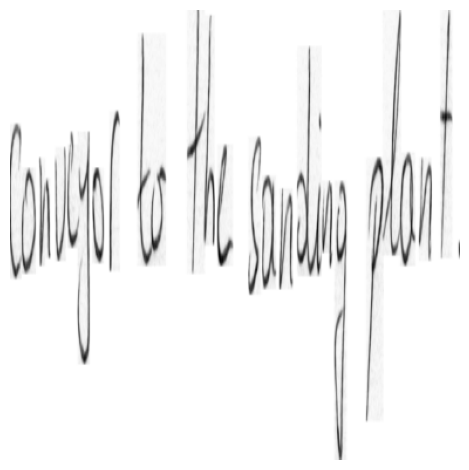

In [6]:
# English example
english_pixel_values = processor(english_image, return_tensors="pt").pixel_values
print(english_pixel_values.shape)
torchshow.show(english_pixel_values)

torch.Size([1, 3, 384, 384])


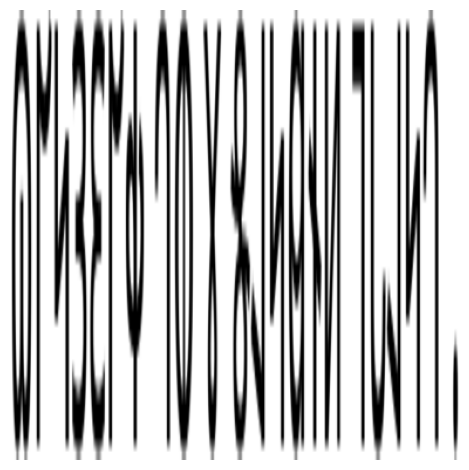

In [7]:
# Deseret example
deseret_pixel_values = processor(deseret_image, return_tensors="pt").pixel_values
print(deseret_pixel_values.shape)
torchshow.show(deseret_pixel_values)

### Datum Final Example

In [8]:
print(english_text)
display(deseret_image)

conveyor to the sanding plant .


## Apply the Deseret Alphabet to the Dataset

In [9]:
iam_data.cleanup_cache_files()

0

In [10]:
from translate import english_to_deseret

def translate_deseret(batch):
    deseret_texts = [english_to_deseret(text, local=True) for text in batch["text"]]
    return {"english": batch["text"], "deseret": deseret_texts}

iam_translated = iam_data.map(translate_deseret, batched=True, batch_size=100, remove_columns=["text"])

Map: 100%|██████████| 11344/11344 [21:31<00:00,  8.78 examples/s]


In [11]:
def apply_text_rendering(batch):
    fontsize = 50
    font = ImageFont.truetype("Noto_Sans_Deseret/NotoSansDeseret-Regular.ttf", size=fontsize)
    images = [text_to_image(text, font=font) for text in batch["deseret"]]
    return {"image": images}

iam_deseret = iam_translated.map(apply_text_rendering, batched=True, batch_size=100)

Map: 100%|██████████| 11344/11344 [01:47<00:00, 105.29 examples/s]


draw up final plans for the " battle
𐐼𐑉𐐫 𐐷𐐭𐐹𐐨 𐑁𐐴𐑌𐐲𐑊 𐐹𐑊𐐰𐑌𐑆 𐑁𐐫𐑉 𐑄 " 𐐺𐐰𐐻𐐲𐑊


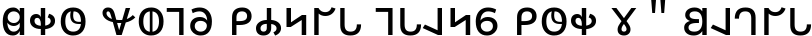

In [12]:
index = 2093
print(iam_deseret[index]["english"])
print(iam_deseret[index]["deseret"])
display(iam_deseret[index]["image"])

In [14]:
iam_deseret.push_to_hub("cayjobla/iam-deseret")

Uploading the dataset shards: 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]
No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/datasets/cayjobla/iam-deseret/commit/bf42fa8ee38fd4e6640e6dfb5a61b922ccca19d0', commit_message='Upload dataset', commit_description='', oid='bf42fa8ee38fd4e6640e6dfb5a61b922ccca19d0', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/cayjobla/iam-deseret', endpoint='https://huggingface.co', repo_type='dataset', repo_id='cayjobla/iam-deseret'), pr_revision=None, pr_num=None)